# Панель администратора Django

   Панель администратора Django — неотъемлемый инструмент, который делает Django выдающимся среди фреймворков для веб-разработки. Панель администратора предоставляет графический интерфейс для управления данными приложения без необходимости писать дополнительный код. 

   Django предлагает готовую к использованию панель администратора, которая позволяет выполнять CRUD-операции для ваших моделей. Эта система включает в себя удобные функции, такие как аутентификация пользователей, авторизация доступа и автоматическое создание форм и интерфейсов для ваших моделей данных. Панель администратора Django делает процесс управления данными простым и интуитивно понятным, что является большим преимуществом при разработке.

### Основные характеристики панели администратора

   * Автоматически созданные интерфейсы для моделей.
   * Встроенные средства аутентификации и авторизации.
   * Возможность настройки интерфейса для различных моделей.

## Создание суперпользователя

   Выполните приведенную ниже команду, чтобы создать пользователя, который будет иметь право управлять сайтом администрирования:

In [ ]:
python manage.py createsuperuser

   Вы увидите следующий ниже результат.<br></br>
   Введите желаемое пользовательское имя (username), адрес электронной почты и пароль, как показано:

Username (leave blank to use 'root'): root<br></br>
Email address: root@root.ru<br></br>
Password: ********<br></br>
Password (again): ********

   И вы увидите такое сообщение об успехе:

Superuser created successfully.

## Сайт администрирования

   Следующей ниже командой запустите сервер разработки:

In [ ]:
python manage.py runserver

   Пройдите по URL-адресу http://127.0.0.1:8000/admin/.

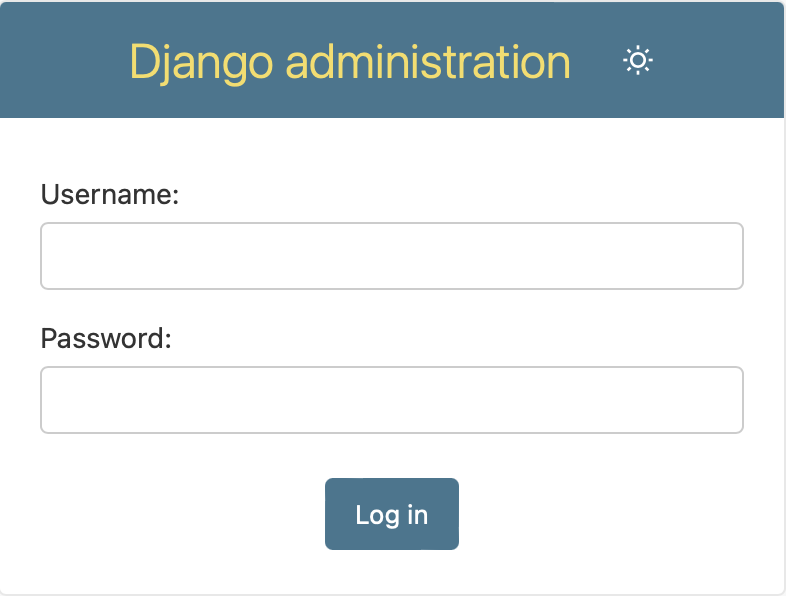

   Войдите на сайт администрирования, используя учетные данные пользователя, которые мы создали на предыдущем шаге. Вы увидите индексную страницу сайта администрирования.

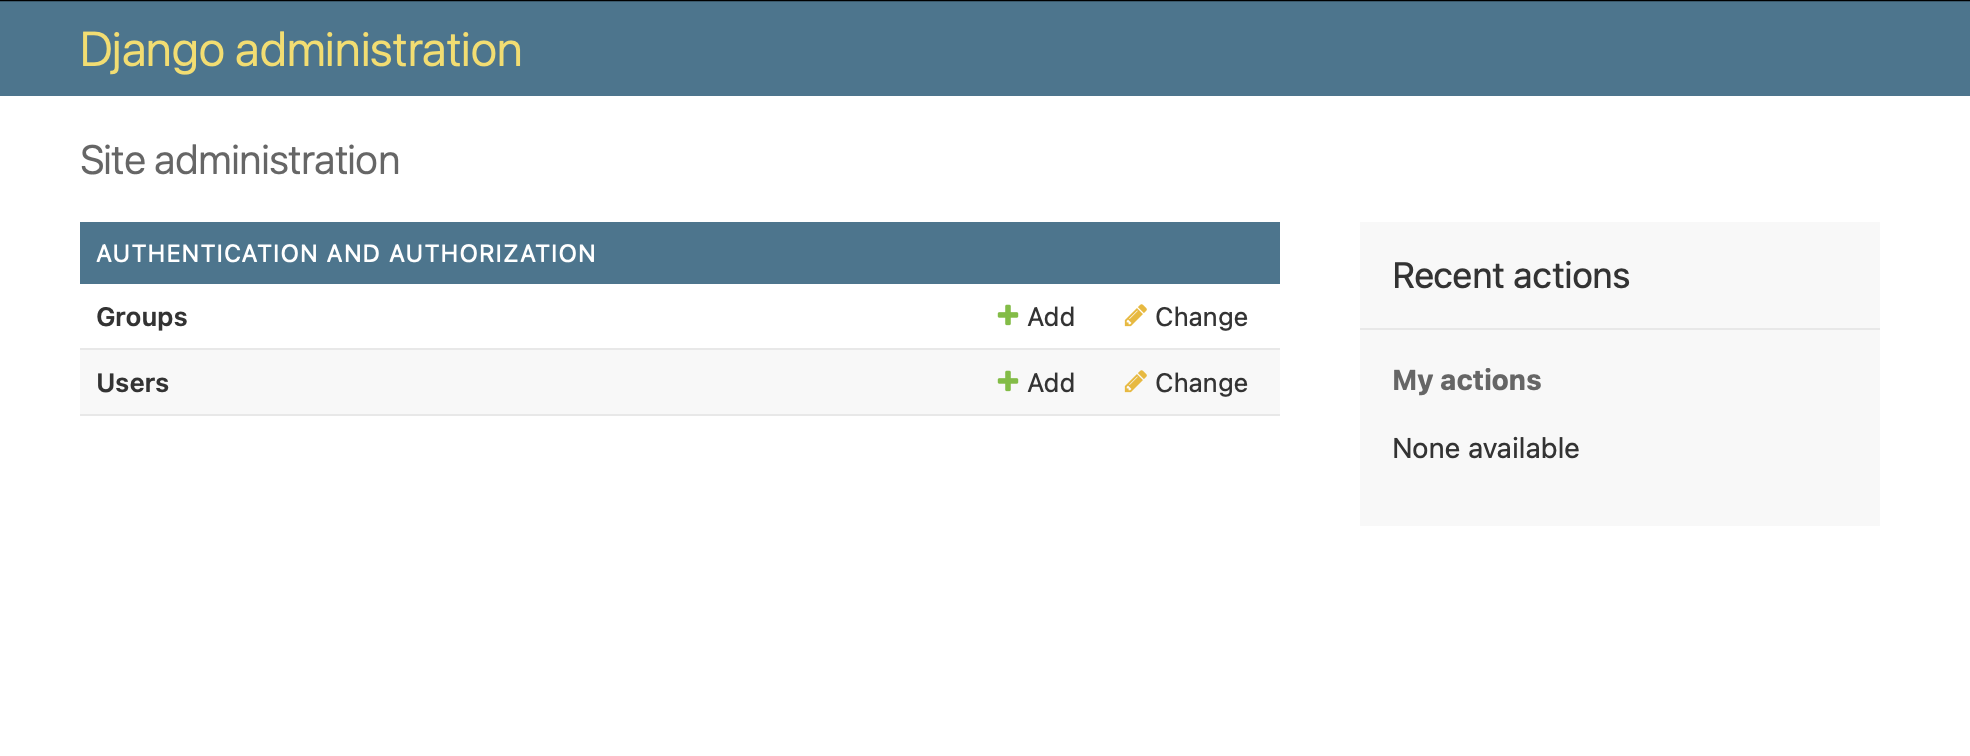

   Модели __Group__ и __User__, которые вы видите, являются частью встроенного в Django фреймворка аутентификации, расположенного в __django.contrib.auth__. Если кликнуть по __Users__ (Пользователи), то можно увидеть пользователя, которого вы создали ранее.

## Добавление моделей на сайт администрирования

   Отредактируйте файл admin.py приложения tasks, придав ему следующий вид:

In [ ]:
from django.contrib import admin
from .models import Project

admin.site.register(Project)

   Теперь перезагрузите сайт администрирования в своем браузере. Вы должны увидеть модель Project на сайте, как показано ниже:

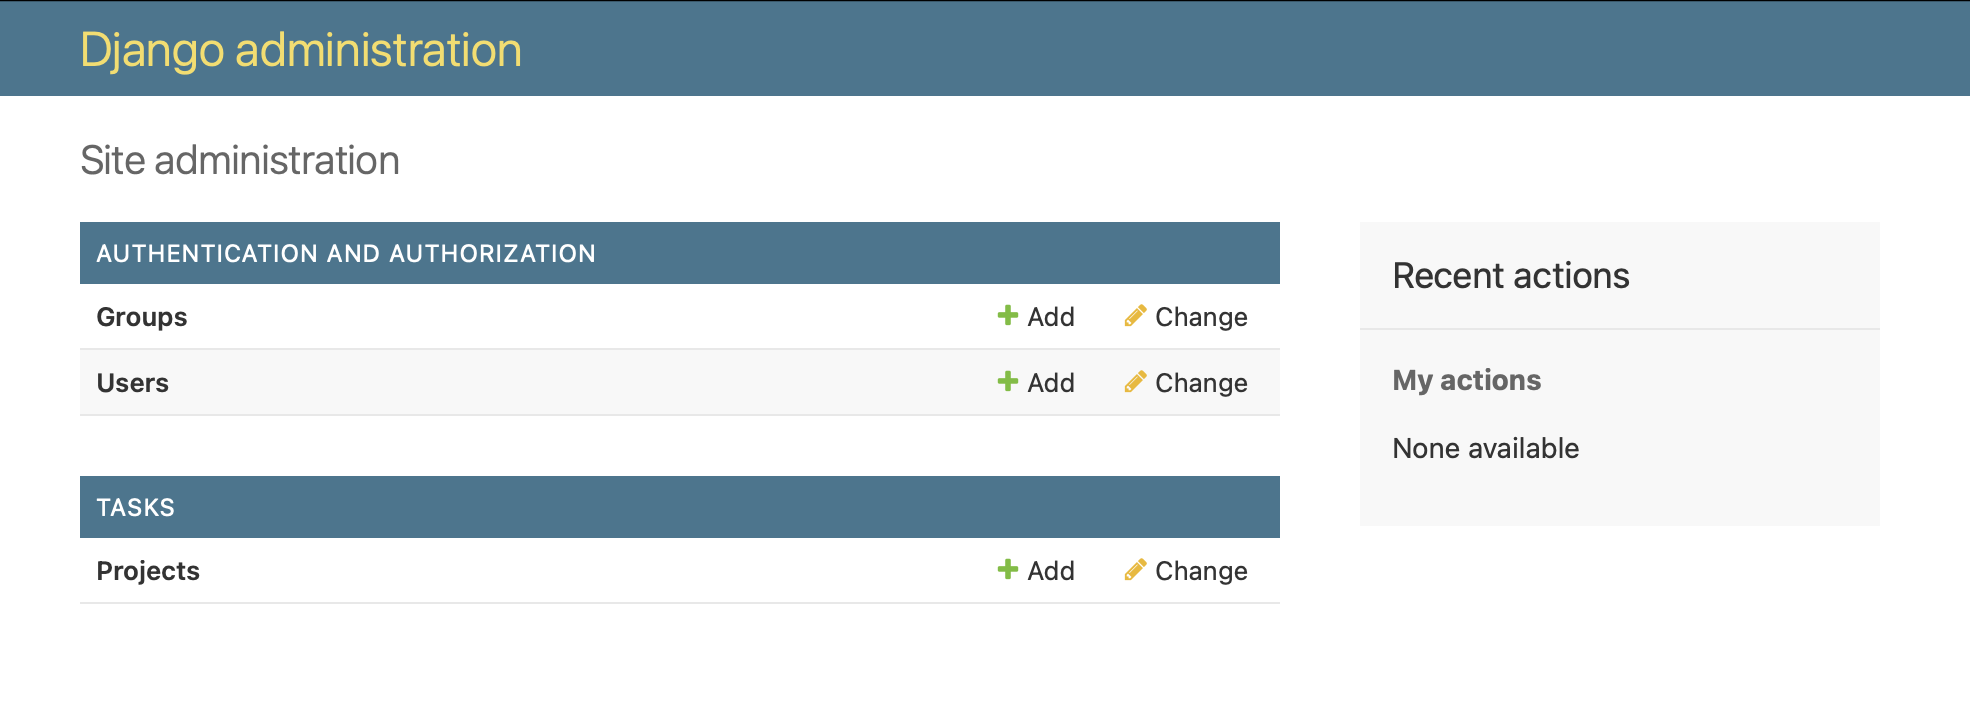

   При регистрации модели на сайте администрирования будет получен удобный интерфейс, сгенерированный путем интроспекции созданных разработчиком моделей, позволяющий простым способом выводить списки, редактировать, создавать и удалять объекты.
   Кликните по ссылке Add (Добавить) напротив Projects (Проекты), чтобы добавить новый проект. Вы увидите форму, которую Django сгенерировал для модели динамически:

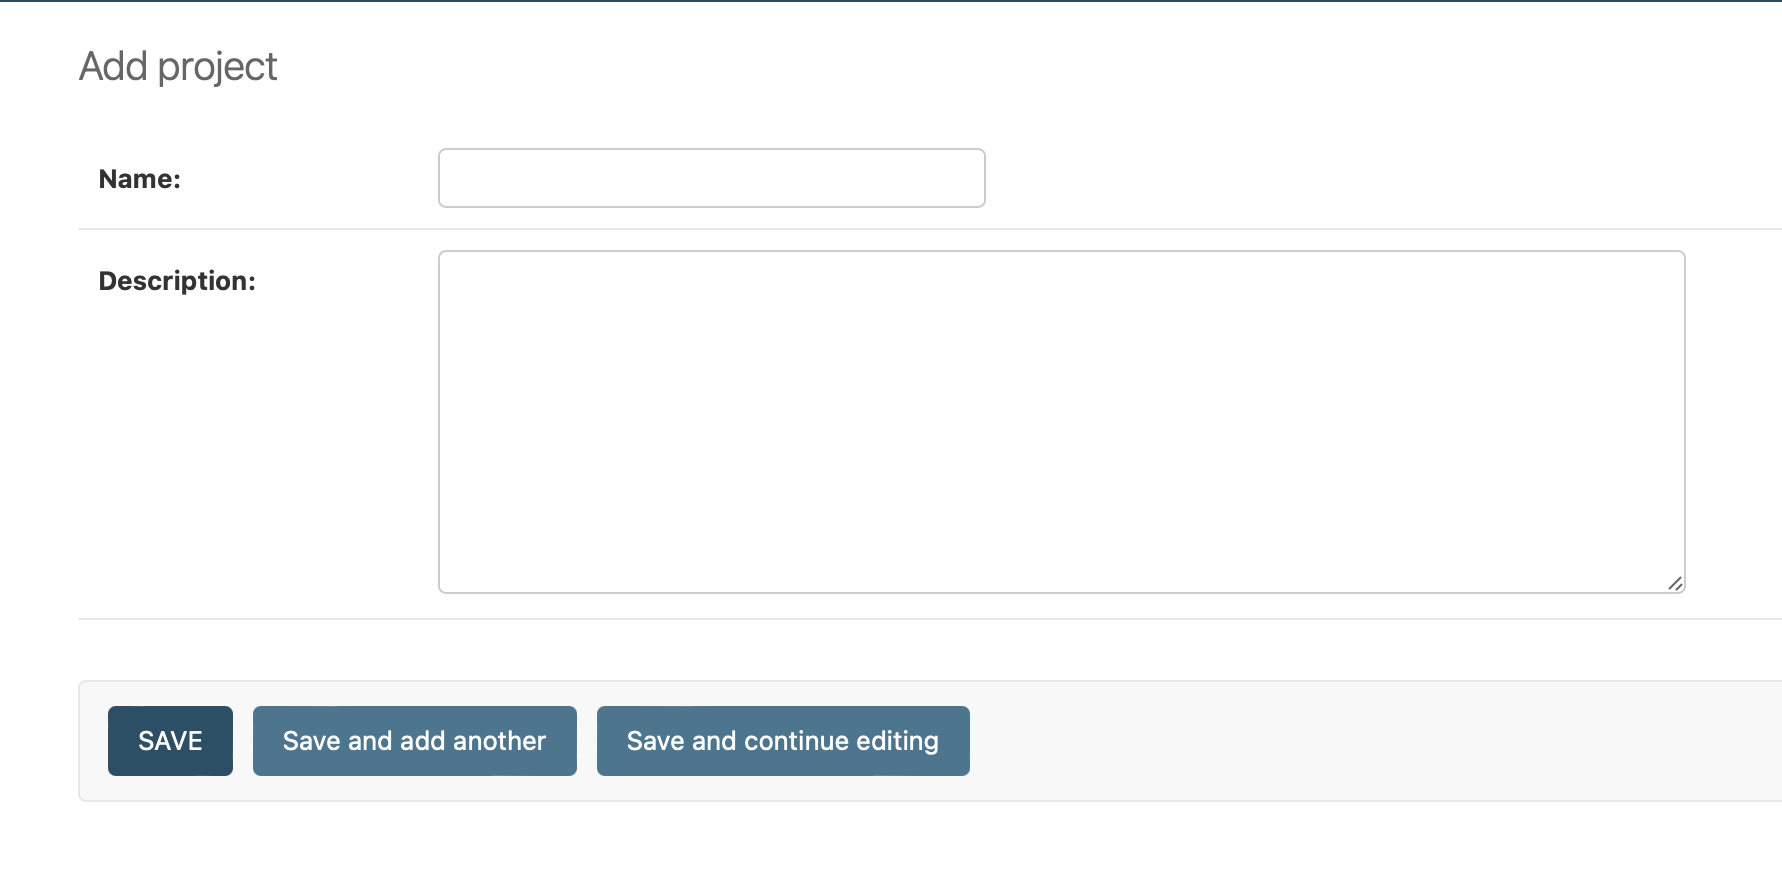

   Заполните форму и кликните по кнопке Save (Сохранить). Вы будете перенаправлены на страницу списка проектов с сообщением об успехе и только что созданным проектом:

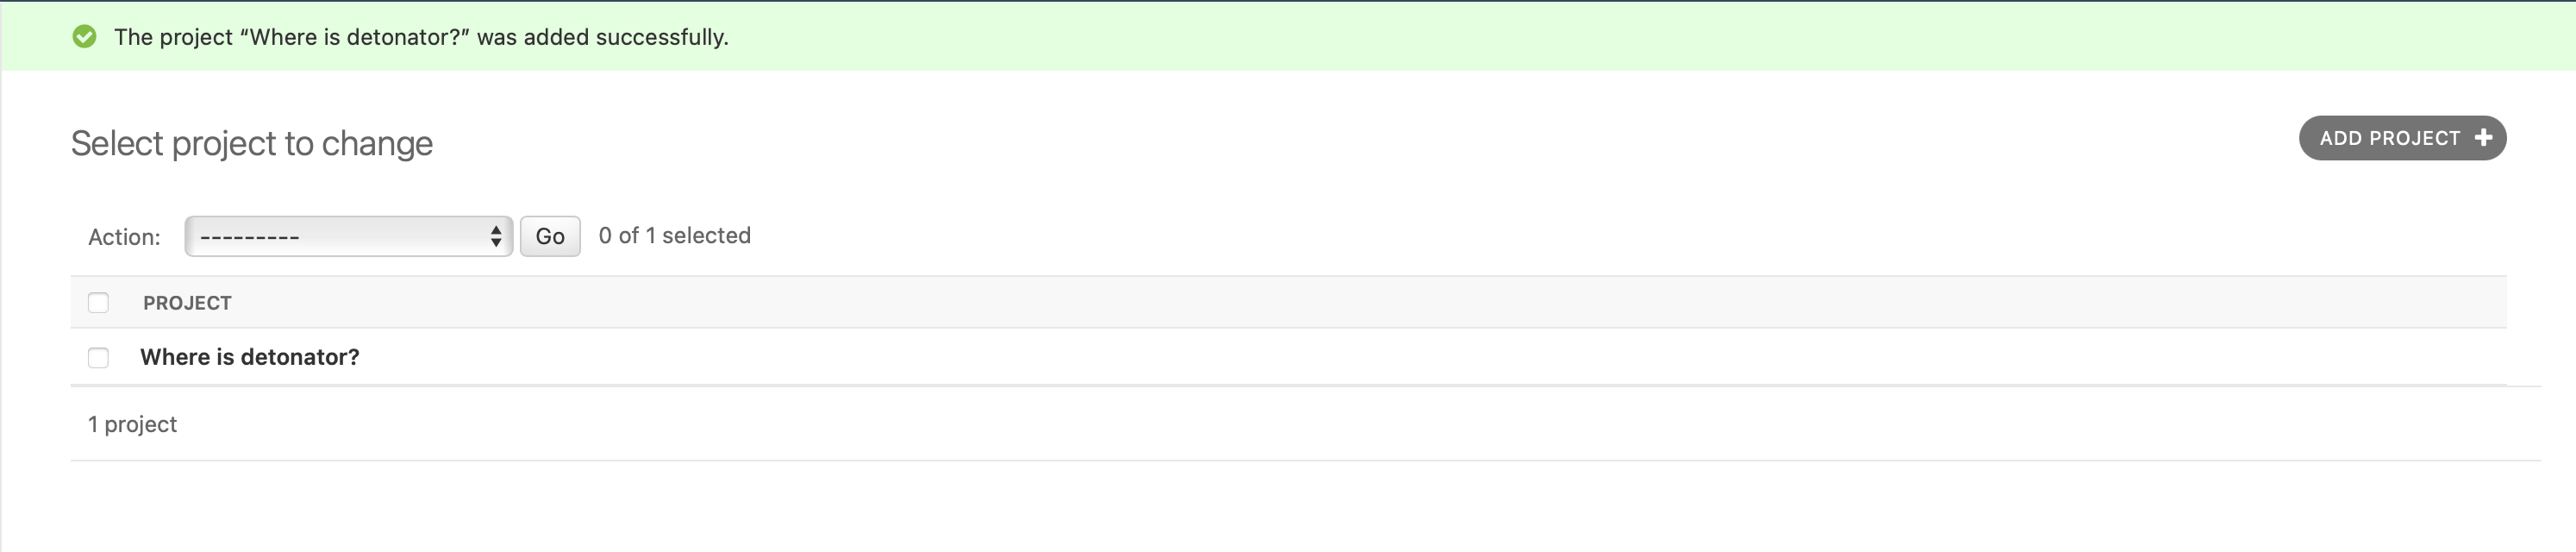

## Адаптация внешнего вида моделей

   Отредактируйте файл admin.py приложения tasks, изменив его, как показано ниже:

In [ ]:
from django.contrib import admin
from .models import Project

# Класс администратора для модели Project
@admin.register(Project)
class ProjectAdmin(admin.ModelAdmin):
    list_display = ('name', 'created_at')
    search_fields = ('name', 'description')
    ordering = ('created_at',)
    date_hierarchy = 'created_at'

   Мы сообщаем сайту администрирования, что модель зарегистрирована на сайте с использованием конкретно-прикладного класса, который наследует от ModelAdmin. В этот класс можно вставлять информацию о том, как показывать модель на сайте и как с ней взаимодействовать. Давайте поближе рассмотрим добавленные атрибуты:

   * __list_display__: Этот атрибут определяет, какие поля модели будут отображаться на странице списка объектов в административном интерфейсе. В данном случае, в списке проектов будут показаны только названия проектов и даты их создания.
   * __search_fields__: Этот атрибут позволяет создать поисковую строку для фильтрации списка объектов. Пользователи могут искать проекты по названию и описанию.
   * __ordering__: Определяет порядок сортировки объектов в списке по умолчанию. Здесь проекты будут упорядочены по дате создания, начиная с самых новых.
   * __date_hierarchy__: Позволяет добавить навигацию по датам, что упрощает поиск проектов, созданных в определённые периоды времени.

   Вернитесь в свой браузер и перезагрузите страницу списка проектов. Теперь она будет выглядеть примерно так:

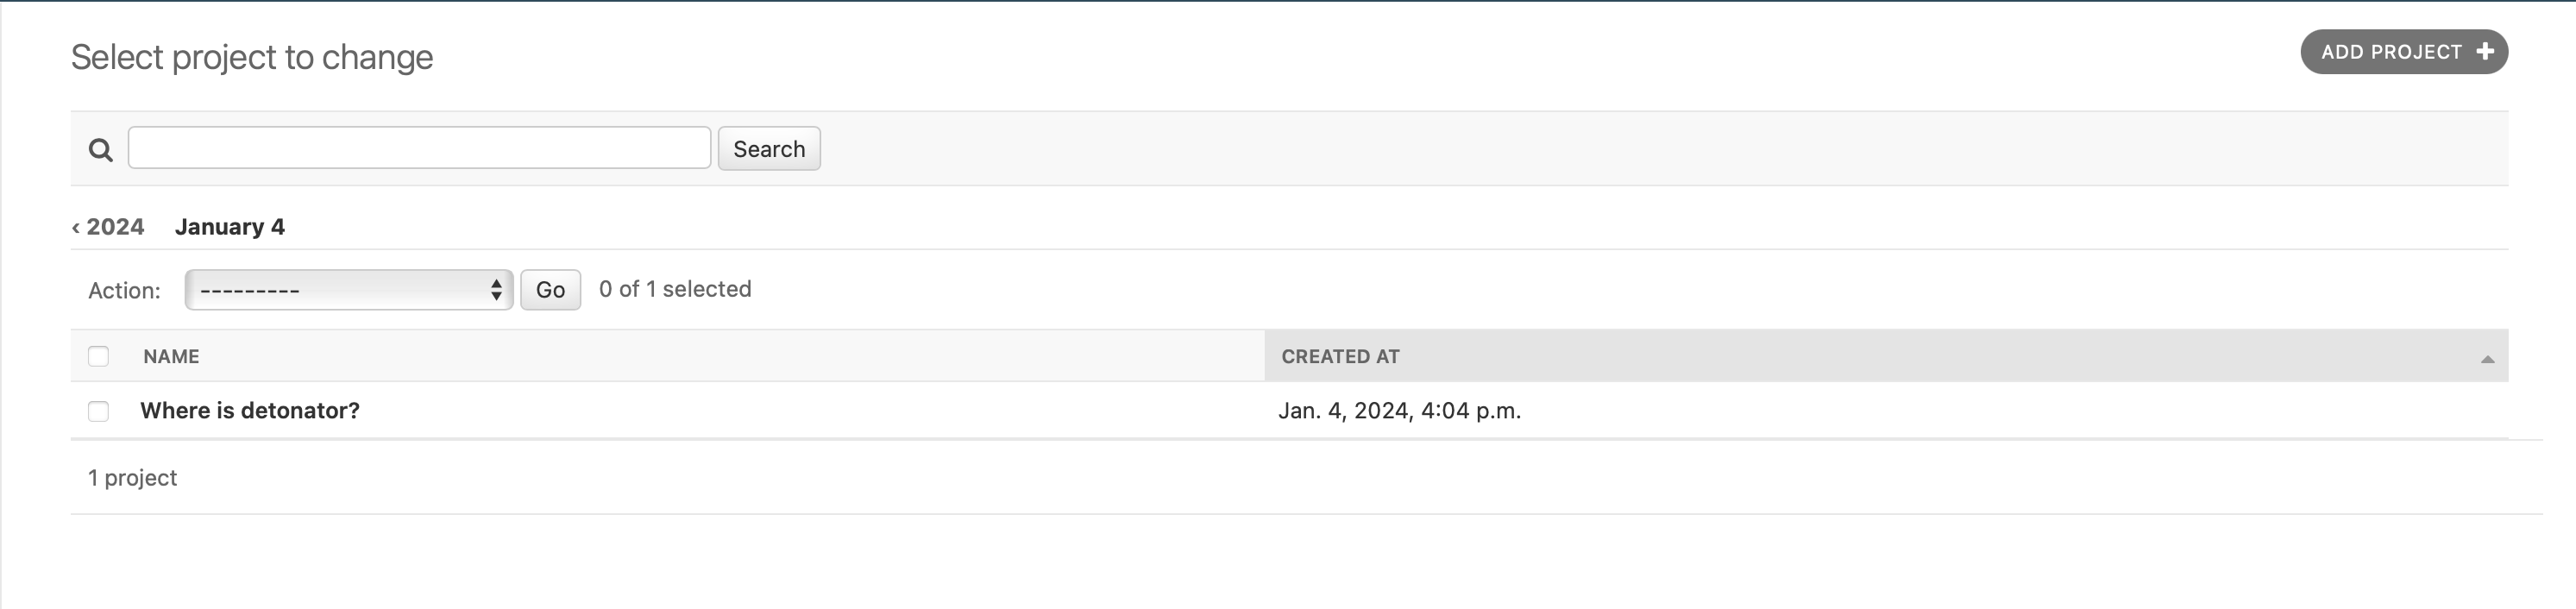

   Давайте также добавим класс администратора для модели Task, чтобы мы могли редактировать задачи.
   Отредактируйте файл admin.py приложения tasks, изменив его, как показано ниже:

In [ ]:
from django.contrib import admin
from .models import Project, Task

# Класс администратора для модели Project
@admin.register(Project)
class ProjectAdmin(admin.ModelAdmin):
    list_display = ('name', 'created_at')
    search_fields = ('name', 'description')
    ordering = ('created_at',)
    date_hierarchy = 'created_at'
    
# Класс администратора для модели Task
@admin.register(Task)
class TaskAdmin(admin.ModelAdmin):
    list_display = ('name', 'project', 'assignee', 'status', 'created_at', 'updated_at')
    list_filter = ('status', 'assignee', 'project')
    search_fields = ('name', 'description')
    list_editable = ('status', 'assignee')
    readonly_fields = ('created_at', 'updated_at')

   Рассмотрим атрибуты ModelAdmin, которые мы используем:

   * __list_display__: Этот список определяет, какие поля модели Task будут отображаться в виде колонок на странице списка задач в административном интерфейсе. Поля __name__, __project__, __assignee__, __status__, __created_at__, и __updated_at__ будут видны при просмотре списка всех задач.
   * __list_filter__: Этот список предоставляет фильтры сбоку от списка задач, позволяя администраторам быстро находить задачи по статусу, назначенному пользователю (__assignee__) или проекту. Пользователи могут кликнуть на один из этих фильтров, чтобы сузить список отображаемых задач.
   * __search_fields__: Определяет поля, по которым будет работать поисковый запрос в административном интерфейсе. Пользователи могут использовать поисковую строку для поиска задач по имени или описанию.
   * __list_editable__: Указывает поля, которые можно будет редактировать непосредственно в интерфейсе списка без необходимости перехода к форме редактирования каждой задачи. В данном случае, можно напрямую изменить __status__ и __assignee__ прямо из списка задач.
   * __readonly_fields__: Эти поля будут доступны только для чтения в форме редактирования. Поля __created_at__ и __updated_at__ содержат временные метки создания и последнего обновления задачи соответственно, и их не следует изменять вручную, поэтому они исключены из редактирования.

   Эти атрибуты настроек позволяют оптимизировать и упростить процесс администрирования задач, предоставляя удобные инструменты для поиска, фильтрации и быстрого редактирования.

   Вернитесь в свой браузер и перейдите обратно на начальную страницу сайта администрирования. Она будет выглядеть примерно так:

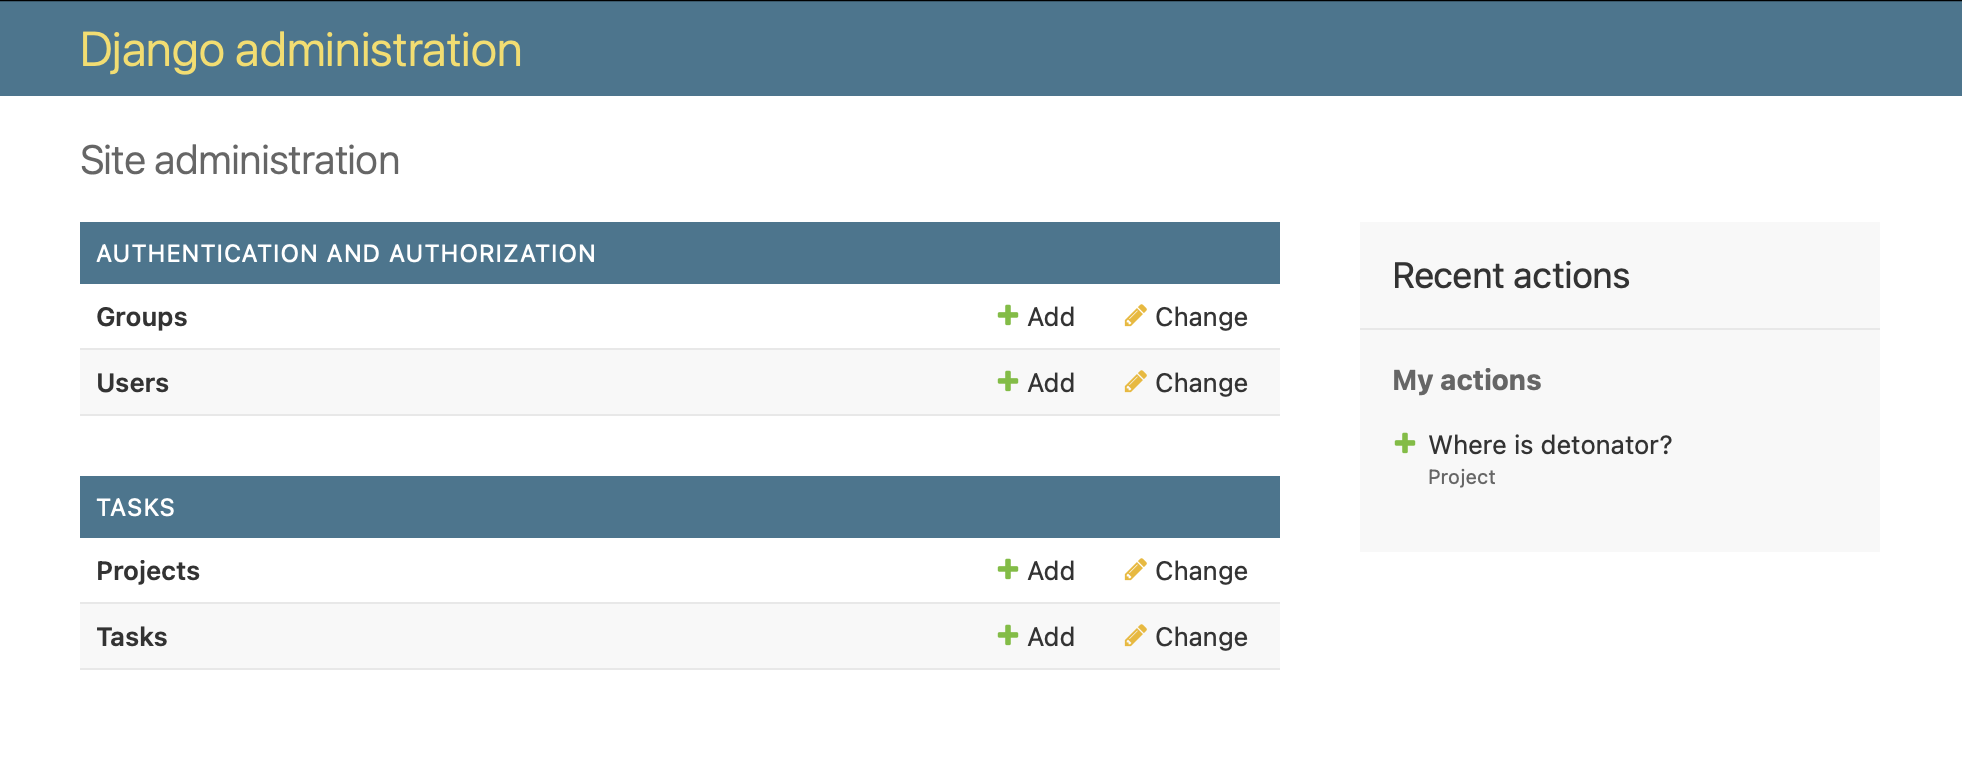

Кликните по ссылке Add (Добавить) напротив Tasks (Задачи), чтобы добавить новую задачу:

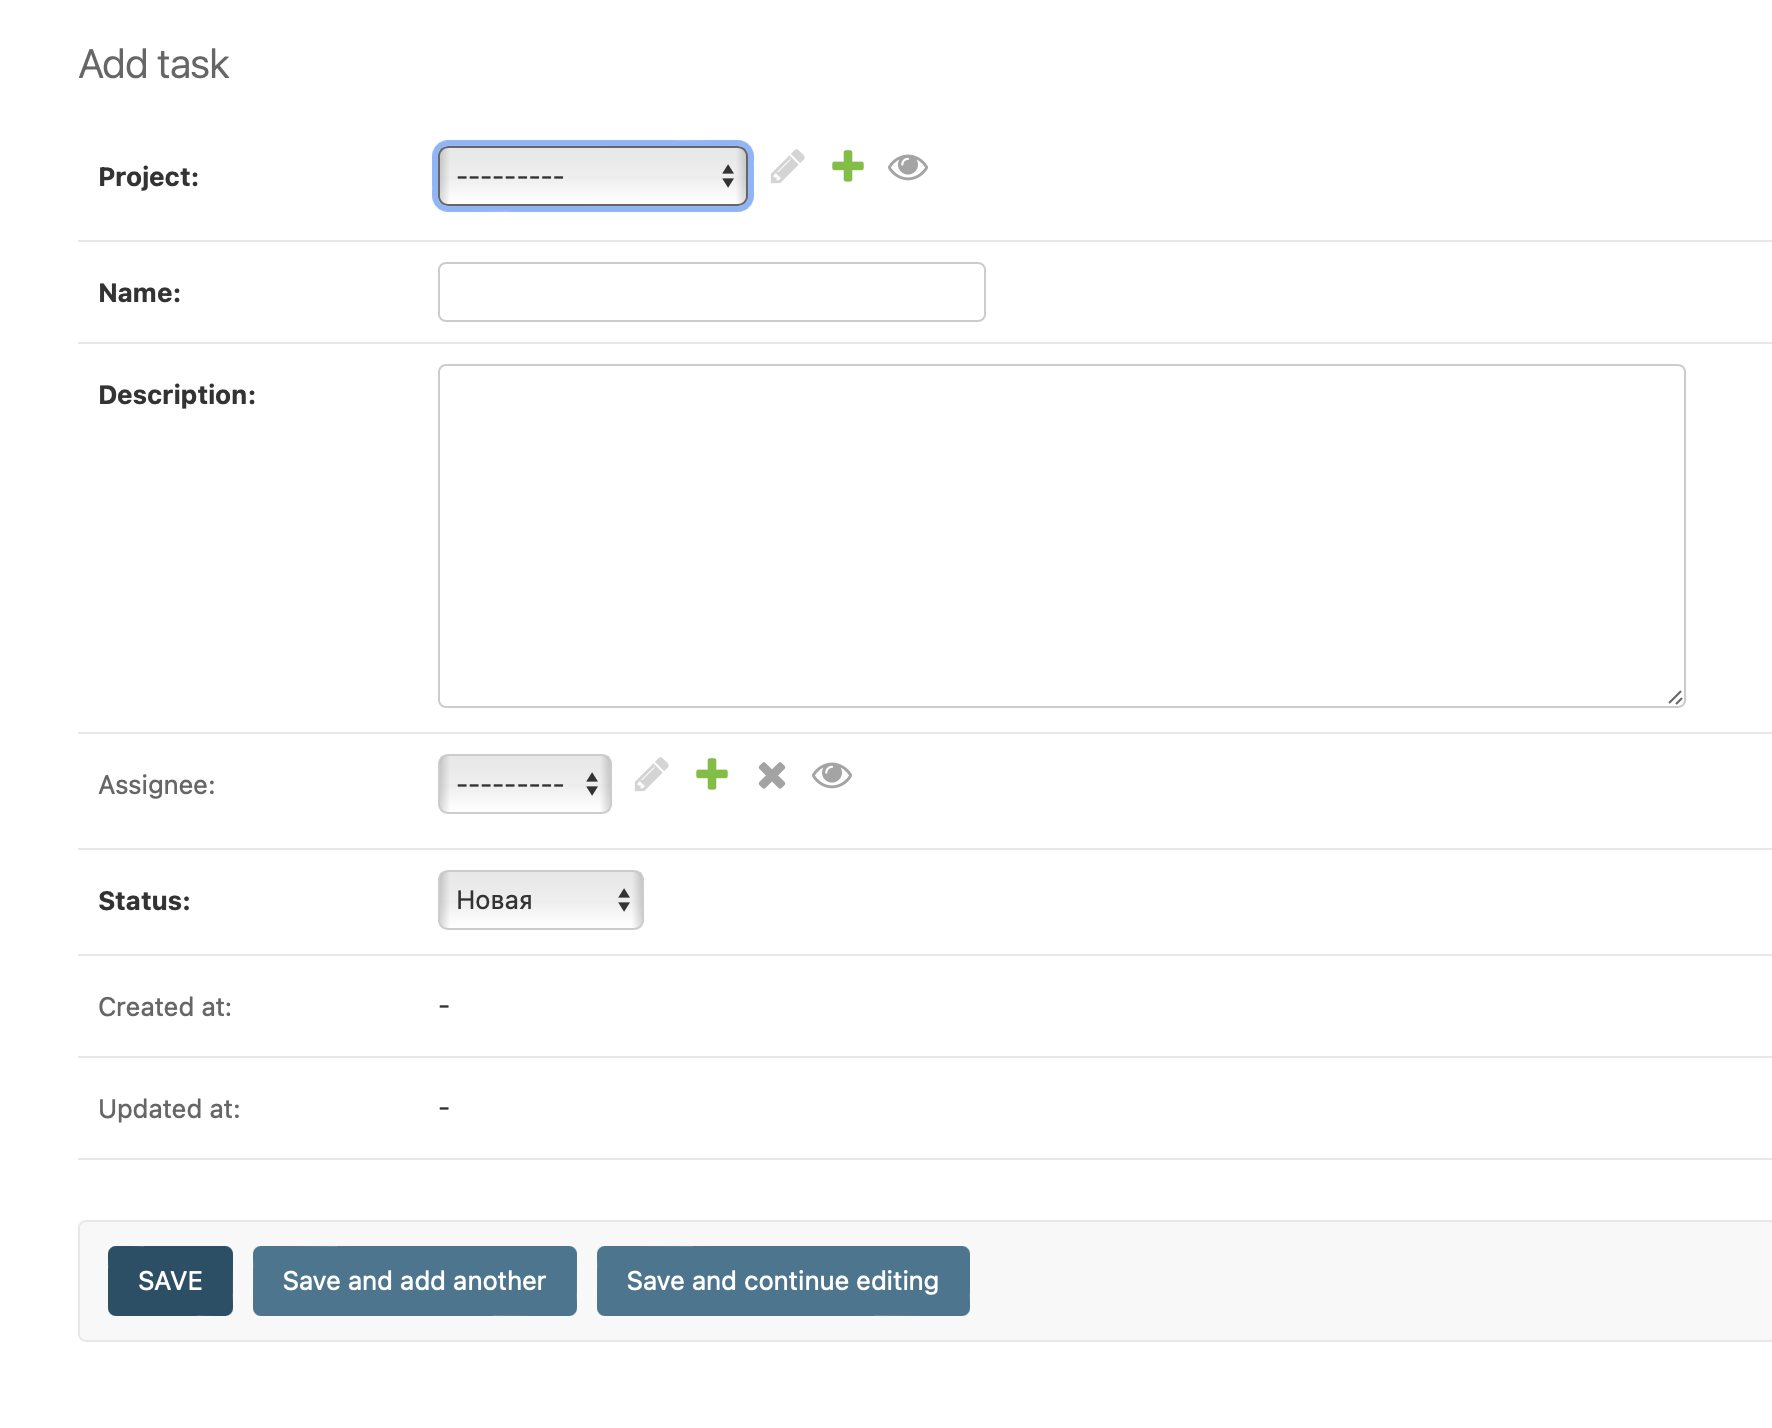

   Заполните форму, выбрав только что созданный проект в Project, и кликните по кнопке Save (Сохранить):

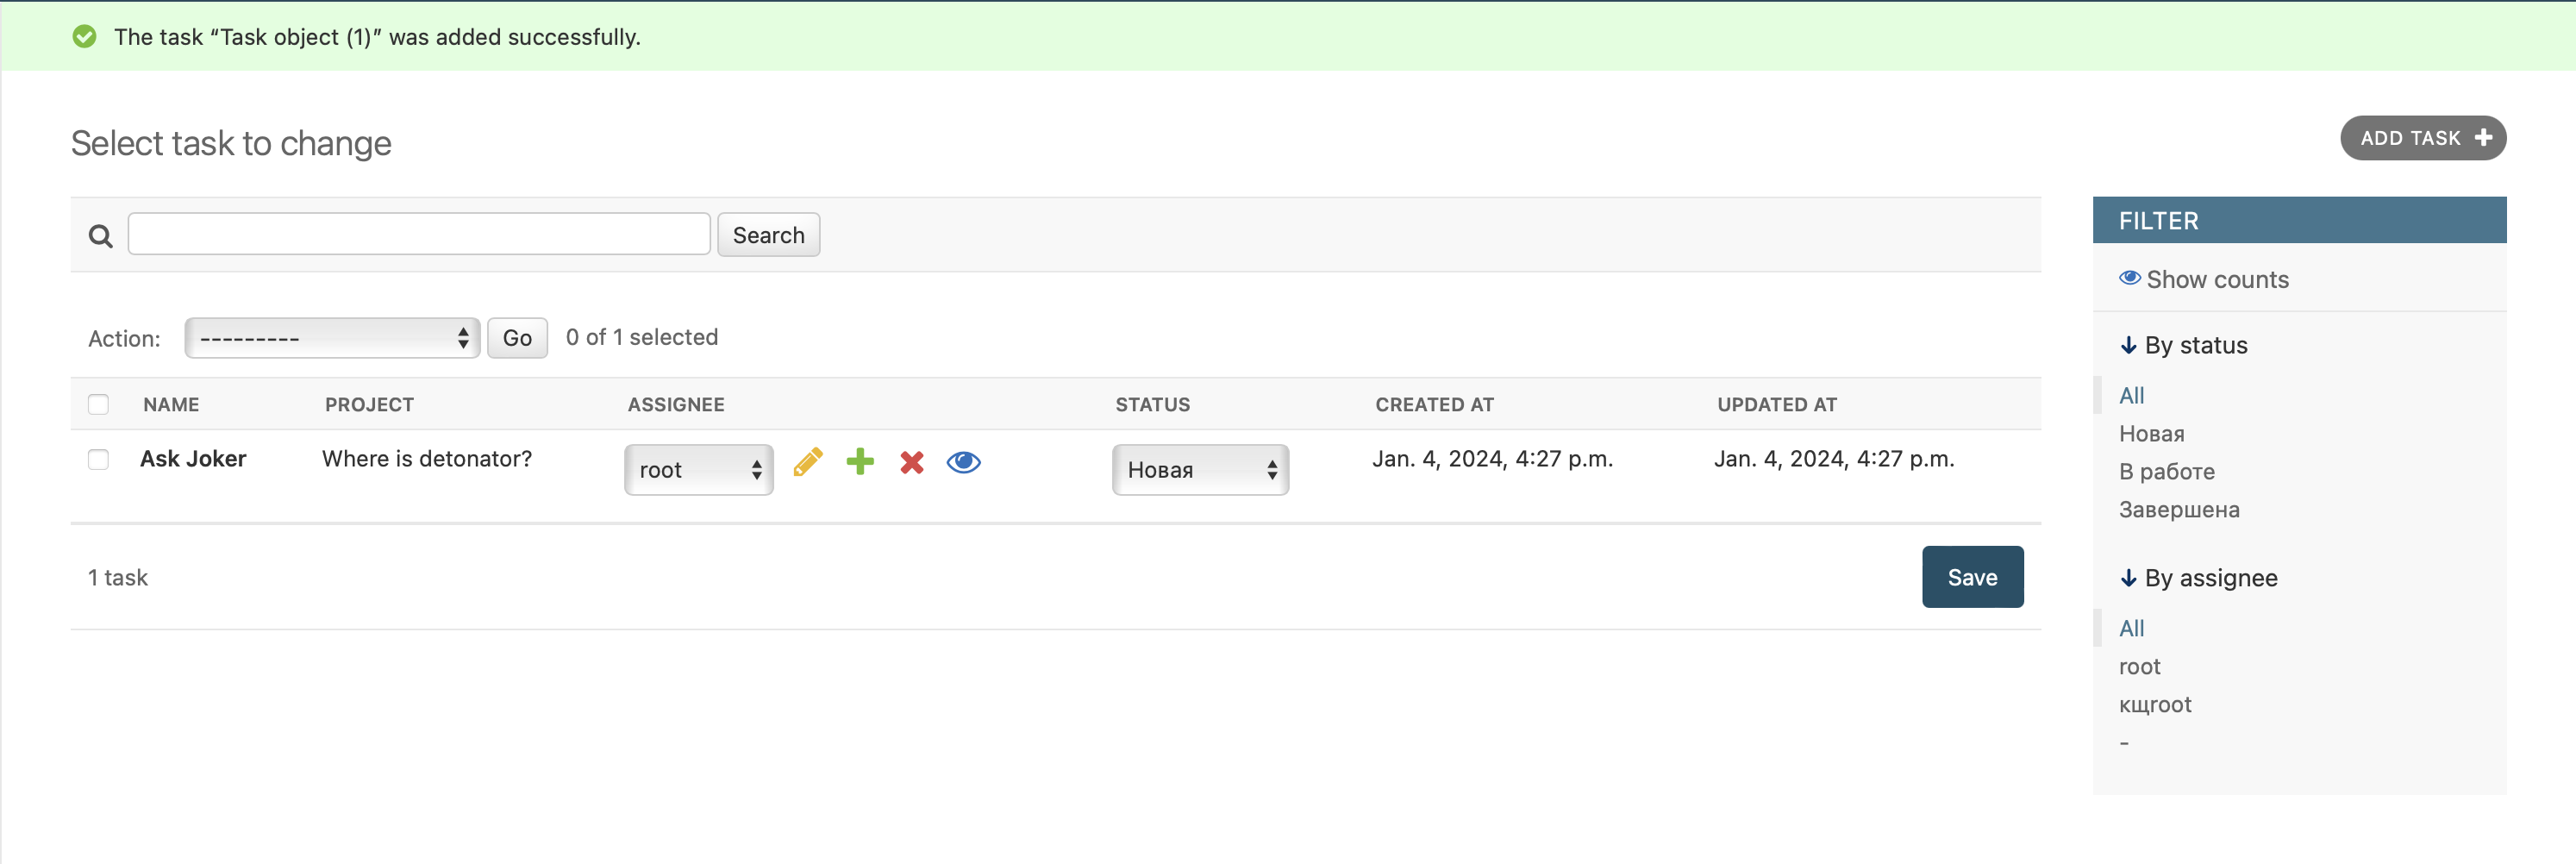

   Как видите, поля __created_at__ и __updated_at__ заполнились автоматически.

## Добавление Inline для Задач

   В Django панель администратора позволяет разработчикам добавлять __inline элементы__, которые представляют связанные объекты внутри родительской модели. Это полезно, когда вы хотите редактировать объекты связанной модели прямо на странице родительской модели без необходимости переходить к отдельному представлению админки для каждого связанного объекта.

   Чтобы добавить задачи в качестве inline в интерфейс проекта, нам нужно создать новый класс __Inline__, который будет наследоваться от __admin.TabularInline__ или __admin.StackedInline__. __TabularInline__ будет отображать связанные объекты в виде таблицы (строк), что обычно более компактно. __StackedInline__ предоставляет более детальное отображение, где каждый объект располагается в своём блоке.

   Отредактируйте файл admin.py приложения tasks, изменив его, как показано ниже:

In [ ]:
from django.contrib import admin
from .models import Project, Task

# Inline класс для модели Task
class TaskInline(admin.TabularInline):
    model = Task
    extra = 0
    fields = ('name', 'description', 'assignee', 'status', 'created_at', 'updated_at')
    readonly_fields = ('created_at', 'updated_at')
    can_delete = True
    show_change_link = True

# Класс администратора для модели Project
@admin.register(Project)
class ProjectAdmin(admin.ModelAdmin):
    list_display = ('name', 'created_at')
    search_fields = ('name', 'description')
    ordering = ('created_at',)
    date_hierarchy = 'created_at'

    # Подключение inline для Task
    inlines = [TaskInline]

# Класс администратора для модели Task
@admin.register(Task)
class TaskAdmin(admin.ModelAdmin):
    list_display = ('name', 'project', 'assignee', 'status', 'created_at', 'updated_at')
    list_filter = ('status', 'assignee', 'project')
    search_fields = ('name', 'description')
    list_editable = ('status', 'assignee')
    readonly_fields = ('created_at', 'updated_at')

   Рассмотрим подробнее атрибуты класса TaskInline:

   * __extra = 0__: Не отображать пустые формы для новых задач по умолчанию.
   * __fields__: Список, в котором указываются поля, которые хотим отредактировать.
   * __readonly_fields__: Список, в котором указываются поля только для чтения.
   * __can_delete__: Булево поле, которое разрешает удалять задачи прямо из интерфейса проекта.
   * __show_change_link__: Булево поле, которое добавляет ссылку для перехода к форме редактирования задачи.

   Также мы указали в атрибуте __inlines__ класса __ProjectAdmin__ список из inline классов, которые хотим, чтобы были связаны с объектом класса Project.

   Перейдем в панель администратора в созданный ранее объект класса Project:

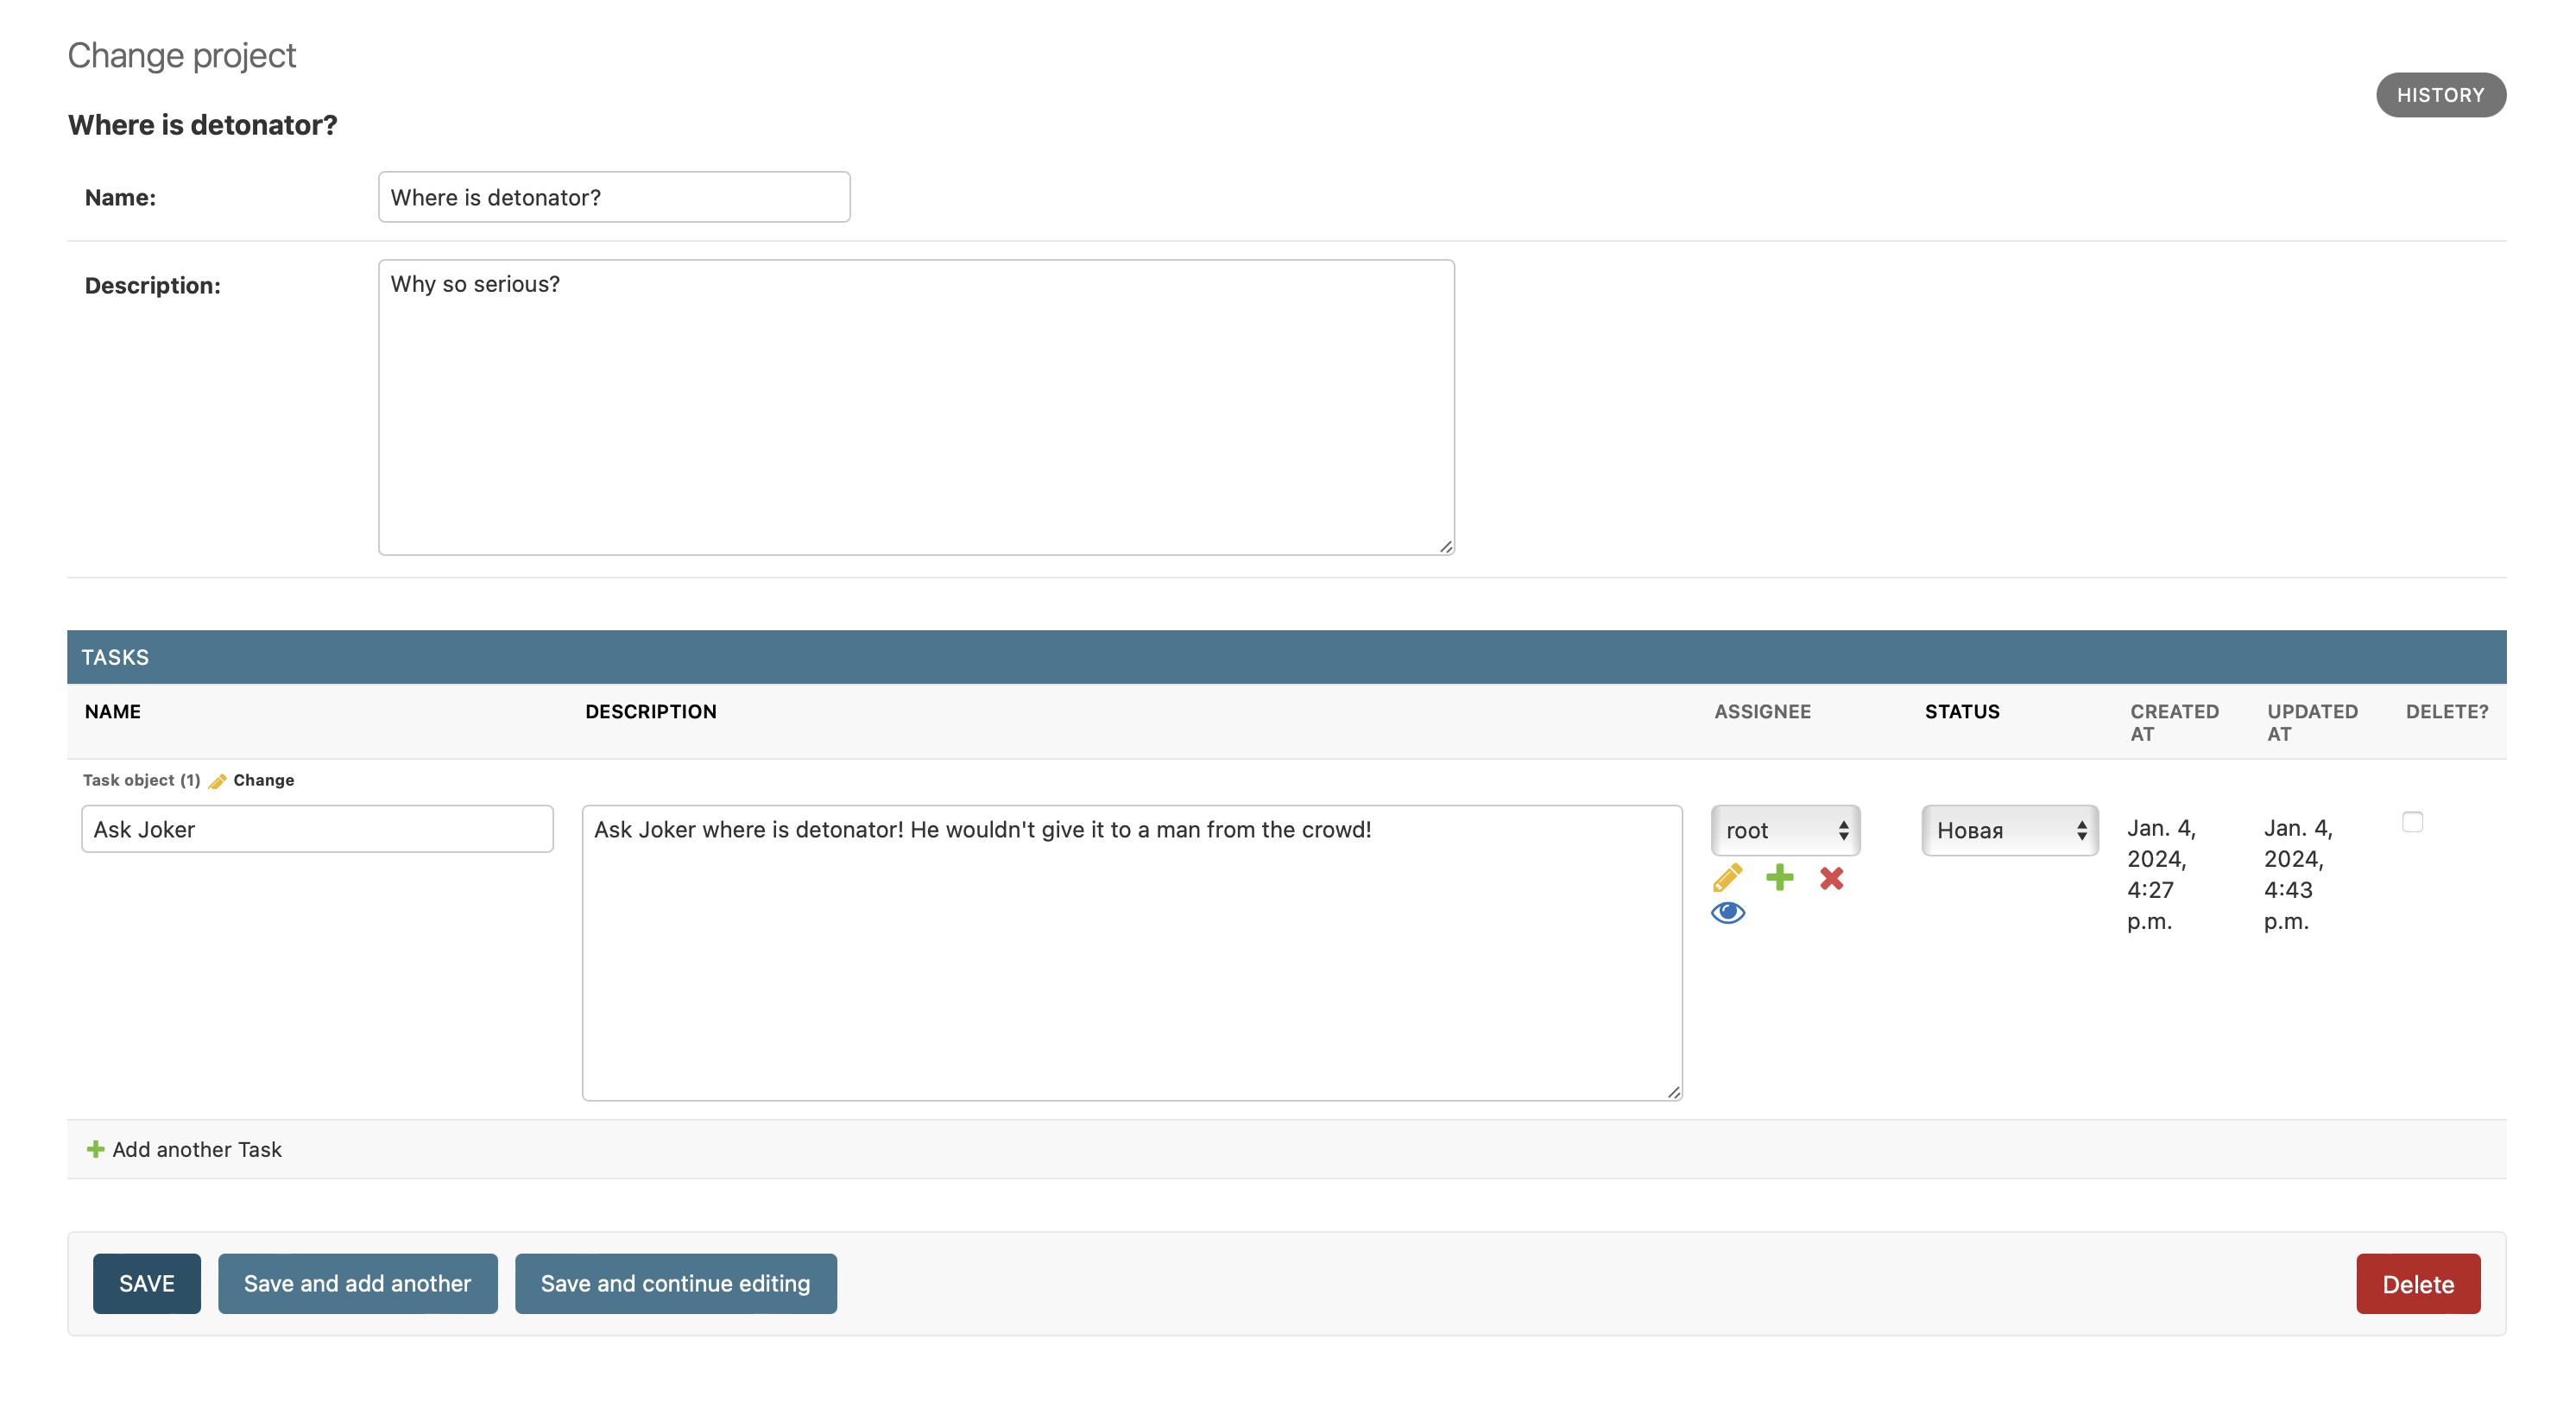

   Теперь мы можем видеть, добавлять, редактировать и удалять задачи изнутри проекта.

# Домашнее задание

1. __Регистрация моделей в админ-панели__:
    * Зарегистрируйте модели __BugReport__ и __FeatureRequest__ своего приложения __quality_control__ в админ-панели Django.
2. __Настройка отображения полей__:
    * Настройте отображение полей в списке объектов моделей __BugReport__ и __FeatureRequest__ в админ-панели. Используйте атрибуты __list_display, list_filter, search_fields__ в классе __ModelAdmin__ для каждой модели.
3. __Настройка формы редактирования__:
    * Настройте формы редактирования для __BugReport__ и __FeatureRequest__. Используйте атрибуты __fieldsets__ и __filter_horizontal/filter_vertical__ (при необходимости) для улучшения интерфейса форм.
4. __Добавление пользовательских действий__:
    * Добавьте пользовательское действие в админ-панель для модели __BugReport__, которое позволит изменять статус багов в выбранных отчетах.
5. __Интеграция с проектом и задачами__:
    * Убедитесь, что в админ-панели корректно отображаются и работают связи с моделями __Project__ и __Task__. Особое внимание уделите отображению связанных данных и возможности их редактирования.
6. __Тестирование__:
    * Проведите тестирование админ-панели. Убедитесь, что все настроенные поля и функции работают корректно. Создайте, отредактируйте и удалите записи в __BugReport__ и __FeatureRequest__ через админ-панель.

Ссылка на документацию Django: https://docs.djangoproject.com/en/5.0/